# Ultimatum Game
## Group 19
Ashir Habib, Muhammad Momin Mustafa, Muhammad Junaid Jamshaid, Shameen Akbar
CS 334 : Principles and Techniques of Data Science

## Overview
This project is inspired by Behavioral economic, where Data Science techniques are used to model behavioral and social preferences to improve classical economic models and to assess their performance.


### Importing relevant modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import f_oneway, ttest_ind

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load  Game Data

In [5]:
# Load games data
experimentData = pd.read_csv('/content/drive/MyDrive/Group19_FinalProject/experiment data - All Games.csv')
experimentData

,Proposer,Responder,Offer,Accepted by responder?,Proposer payoff,Responder payoff,Round,Game
0,Aaaa (1) ​,Player 8 (8) ​,40 points,Yes,60 points,40 points,1,17671
1,Player 7 (7) ​,Player 4 (2) ​,40 points,Yes,60 points,40 points,1,17671
2,Mo (3) ​,🌚🌝 (6) ​,20 points,No,0 points,0 points,1,17671
3,Exotic Horse (5) ​,Player 1 (4) ​,30 points,Yes,70 points,30 points,1,17671
4,Player 9 (9) ​,Bubz (10) ​,NaN,NaN,0 points,0 points,1,17671
...,...,...,...,...,...,...,...,...
277,Player 11 (11) ​,Alpha (14) ​,20 points,No,0 points,0 points,3,18781
278,Player 15 (15) ​,Xoxo 😍💋 (12) ​,10 points,Yes,90 points,10 points,3,18781
279,Player 13 (13) ​,Boss level (22) ​,50 points,No,0 points,0 points,3,18781
280,Player 19 (19) ​,Wonder (18) ​,NaN,NaN,0 points,0 points,3,18781


### Dealing with missing values

In [6]:
# Remove rows with empty cells
print(experimentData.isna().sum())
experimentData.dropna(inplace=True,subset=['Offer','Accepted by responder?'])
print(experimentData.isna().sum())
print(experimentData.shape)
experimentData

Proposer                   0
Responder                  0
Offer                     45
Accepted by responder?    54
Proposer payoff            0
Responder payoff           0
Round                      0
Game                       0
dtype: int64
Proposer                  0
Responder                 0
Offer                     0
Accepted by responder?    0
Proposer payoff           0
Responder payoff          0
Round                     0
Game                      0
dtype: int64
(228, 8)


,Proposer,Responder,Offer,Accepted by responder?,Proposer payoff,Responder payoff,Round,Game
0,Aaaa (1) ​,Player 8 (8) ​,40 points,Yes,60 points,40 points,1,17671
1,Player 7 (7) ​,Player 4 (2) ​,40 points,Yes,60 points,40 points,1,17671
2,Mo (3) ​,🌚🌝 (6) ​,20 points,No,0 points,0 points,1,17671
3,Exotic Horse (5) ​,Player 1 (4) ​,30 points,Yes,70 points,30 points,1,17671
5,Aaaa (1) ​,Player 8 (8) ​,30 points,Yes,70 points,30 points,2,17671
...,...,...,...,...,...,...,...,...
276,Player 17 (17) ​,Player (10) ​,10 points,No,0 points,0 points,3,18781
277,Player 11 (11) ​,Alpha (14) ​,20 points,No,0 points,0 points,3,18781
278,Player 15 (15) ​,Xoxo 😍💋 (12) ​,10 points,Yes,90 points,10 points,3,18781
279,Player 13 (13) ​,Boss level (22) ​,50 points,No,0 points,0 points,3,18781


### Data Cleaning

In [7]:
# Clean Data
experimentData['Proposer id'] = experimentData['Proposer'].str.extract(r'\((\d+)\)')
experimentData['Responder id'] = experimentData['Responder'].str.extract(r'\((\d+)\)')
experimentData['Proposer Player id'] = experimentData['Game'].astype(int) * 100 + experimentData['Proposer id'].astype(int)
experimentData['Responder Player id'] = experimentData['Game'].astype(int) * 100 + experimentData['Responder id'].astype(int)
experimentData['Proposer payoff'] = experimentData['Proposer payoff'].str.removesuffix(" points").astype(int)
experimentData['Responder payoff'] = experimentData['Responder payoff'].str.removesuffix(" points").astype(int)
experimentData['Offer'] = experimentData['Offer'].str.removesuffix(" points").astype(int)
experimentData['Accepted by responder?'] = (experimentData['Accepted by responder?'] == 'Yes').astype(int)

# plt.hist(experimentData['Offer'])
experimentData

,Proposer,Responder,Offer,Accepted by responder?,Proposer payoff,Responder payoff,Round,Game,Proposer id,Responder id,Proposer Player id,Responder Player id
0,Aaaa (1) ​,Player 8 (8) ​,40,1,60,40,1,17671,1,8,1767101,1767108
1,Player 7 (7) ​,Player 4 (2) ​,40,1,60,40,1,17671,7,2,1767107,1767102
2,Mo (3) ​,🌚🌝 (6) ​,20,0,0,0,1,17671,3,6,1767103,1767106
3,Exotic Horse (5) ​,Player 1 (4) ​,30,1,70,30,1,17671,5,4,1767105,1767104
5,Aaaa (1) ​,Player 8 (8) ​,30,1,70,30,2,17671,1,8,1767101,1767108
...,...,...,...,...,...,...,...,...,...,...,...,...
276,Player 17 (17) ​,Player (10) ​,10,0,0,0,3,18781,17,10,1878117,1878110
277,Player 11 (11) ​,Alpha (14) ​,20,0,0,0,3,18781,11,14,1878111,1878114
278,Player 15 (15) ​,Xoxo 😍💋 (12) ​,10,1,90,10,3,18781,15,12,1878115,1878112
279,Player 13 (13) ​,Boss level (22) ​,50,0,0,0,3,18781,13,22,1878113,1878122


### Load Gender Data

In [9]:
# Load gender data
genderData = pd.read_csv('/content/drive/MyDrive/Group19_FinalProject/experiment data - Gender Data.csv')
genderData

,User,Gender,Game
0,1,F,17671
1,2,F,17671
2,3,F,17671
3,4,M,17671
4,5,M,17671
...,...,...,...
187,20,M,18781
188,21,M,18781
189,22,M,18781
190,23,M,18781


### Clean Gender Data
Gender variables are encoded 1 for Female and 0 for Males

In [10]:
print(genderData.isna().sum())
genderData['Gender'] = (genderData['Gender'] == 'F').astype(int)
genderData['Player id'] = genderData['Game'].astype(int) * 100 + genderData['User'].astype(int)
genderData.drop(labels=['Game','User'], inplace=True, axis=1)
genderData


User      0
Gender    0
Game      0
dtype: int64


,Gender,Player id
0,1,1767101
1,1,1767102
2,1,1767103
3,0,1767104
4,0,1767105
...,...,...
187,0,1878120
188,0,1878121
189,0,1878122
190,0,1878123


### Merge with initial DataFrame

In [11]:
experimentData = experimentData.merge(genderData, left_on='Proposer Player id', right_on='Player id')

experimentData = experimentData.merge(genderData, left_on='Responder Player id', right_on='Player id')
experimentData.rename(columns={"Gender_y": "Responder gender", "Gender_x":"Proposer gender"}, inplace=True)
experimentData.drop(['Proposer','Responder','Player id_x', 'Player id_y'], inplace=True, axis=1)
experimentData

,Offer,Accepted by responder?,Proposer payoff,Responder payoff,Round,Game,Proposer id,Responder id,Proposer Player id,Responder Player id,Proposer gender,Responder gender
0,40,1,60,40,1,17671,1,8,1767101,1767108,1,0
1,30,1,70,30,2,17671,1,8,1767101,1767108,1,0
2,10,0,0,0,3,17671,1,8,1767101,1767108,1,0
3,40,1,60,40,1,17671,7,2,1767107,1767102,0,1
4,20,1,80,20,2,17671,7,2,1767107,1767102,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223,60,1,40,60,2,18781,13,22,1878113,1878122,1,0
224,50,0,0,0,3,18781,13,22,1878113,1878122,1,0
225,100,1,0,100,1,18781,23,20,1878123,1878120,0,0
226,70,1,30,70,2,18781,23,20,1878123,1878120,0,0


## Exploratory Data Analysis

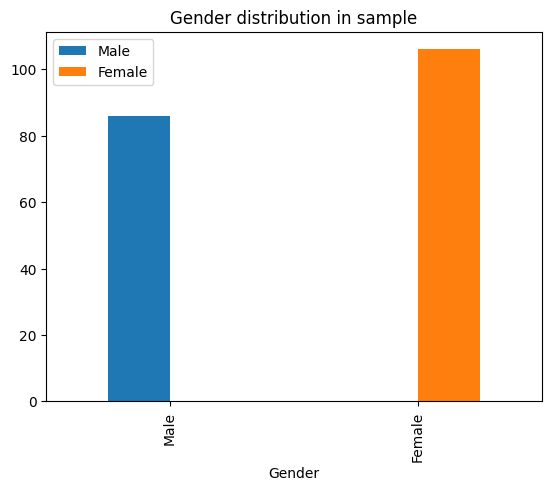

% of females in sample is  0.5520833333333334


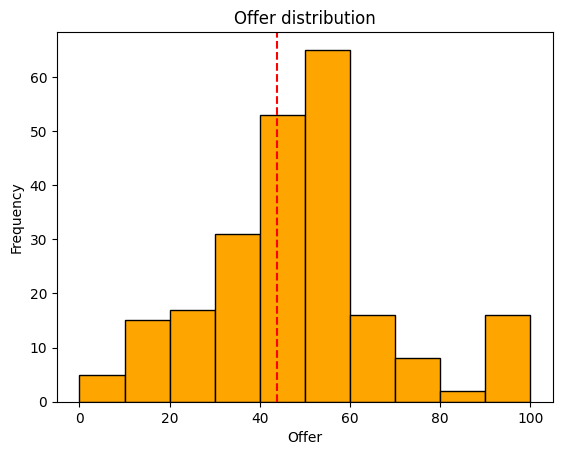

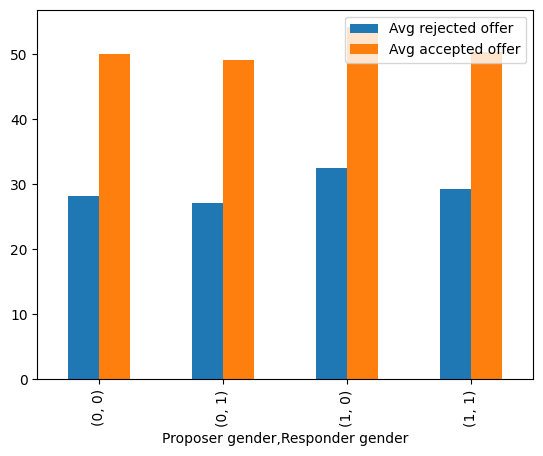

In [12]:
# EDA - graphical exploration

genderData.groupby('Gender').agg({'Gender':'value_counts'}).unstack().plot(kind='bar').set_xticklabels(['Male','Female'])
plt.legend(['Male','Female'])
plt.title("Gender distribution in sample")
plt.show()
print('% of females in sample is ', genderData['Gender'].mean())

plt.hist(experimentData['Offer'], bins=10, color='orange', edgecolor='black')
plt.axvline(experimentData['Offer'].mean(), color='red', linestyle='dashed')
plt.xlabel("Offer")
plt.ylabel("Frequency")
plt.title("Offer distribution")
plt.show()

experimentData.groupby(['Proposer gender', 'Responder gender','Accepted by responder?']).agg({'Offer':'mean'}).unstack().plot(kind='bar')
plt.legend(['Avg rejected offer','Avg accepted offer'])
plt.show()



## EDA for changes by Round

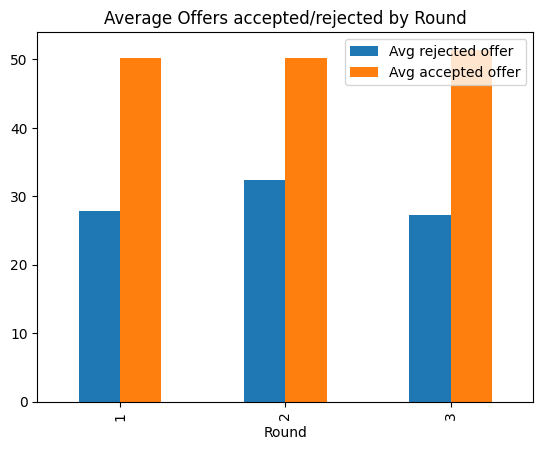

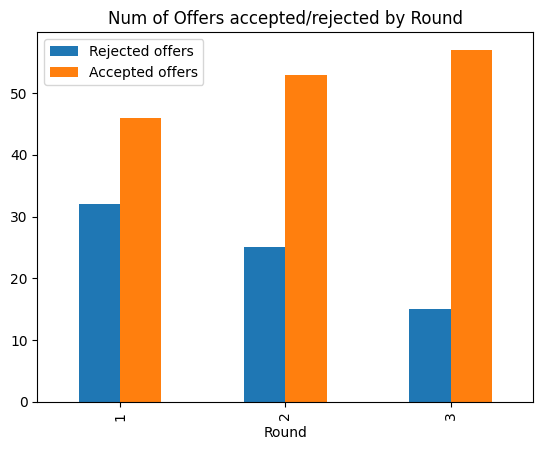

In [13]:
experimentData.groupby(['Round','Accepted by responder?']).agg({'Offer':'mean'}).unstack().plot(kind='bar')
plt.legend(['Avg rejected offer','Avg accepted offer'])
plt.title('Average Offers accepted/rejected by Round')
plt.show()

experimentData.groupby('Round').agg({'Accepted by responder?':'value_counts'}).unstack().plot(kind='bar')
plt.legend(['Rejected offers','Accepted offers'])
plt.title('Num of Offers accepted/rejected by Round')
plt.show()

## Statistical Inferences

### Comparing Offer by Round using one-way ANOVA

In [14]:
df = experimentData

# Group the data by the "Round" variable
grouped_data = [group['Offer'] for name, group in df.groupby('Round')]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print results
print(f'One-way ANOVA results:')
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in Offer between the rounds.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Offer between the rounds.")


One-way ANOVA results:
F-statistic: 1.2432148366088382
P-value: 0.29042910719000053
Fail to reject the null hypothesis. There is no significant difference in Offer between the rounds.


### Comparing Offer Acceptance by Round using one-way ANOVA

In [15]:
df = experimentData

# Group the data by the "Round" variable
grouped_data = [group['Accepted by responder?'] for name, group in df.groupby('Round')]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print results
print(f'One-way ANOVA results:')
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in Acceptance between the rounds.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Acceptance between the rounds.")


One-way ANOVA results:
F-statistic: 3.6039979926987953
P-value: 0.02879728977188697
Reject the null hypothesis. There is a significant difference in Acceptance between the rounds.


### Drill down to isolate effects between individual Rounds

In [16]:
df = experimentData

# Group the data by the "Round" variable
grouped_data = df.groupby('Round')['Accepted by responder?']

# Perform t-tests for each pair of rounds
rounds = df['Round'].unique()
for i in range(len(rounds)):
    for j in range(i + 1, len(rounds)):
        round1 = rounds[i]
        round2 = rounds[j]

        # Extract the Offer data for the two rounds
        data_round1 = grouped_data.get_group(round1)
        data_round2 = grouped_data.get_group(round2)

        # Perform t-test
        t_statistic, p_value = ttest_ind(data_round1, data_round2)

        # Print results
        print(f'T-test between Round {round1} and Round {round2}:')
        print(f'T-statistic: {t_statistic}')
        print(f'P-value: {p_value}\n')

        if p_value < 0.05:
            print("Reject the null hypothesis. There is a significant difference in Acceptance between the rounds.")
        else:
            print("Fail to reject the null hypothesis. There is no significant difference in Acceptance between the rounds.")



T-test between Round 1 and Round 2:
T-statistic: -1.161441043933847
P-value: 0.24725960308924638

Fail to reject the null hypothesis. There is no significant difference in Acceptance between the rounds.
T-test between Round 1 and Round 3:
T-statistic: -2.710720923009864
P-value: 0.0075075635857354845

Reject the null hypothesis. There is a significant difference in Acceptance between the rounds.
T-test between Round 2 and Round 3:
T-statistic: -1.5543458804418784
P-value: 0.1222377508845393

Fail to reject the null hypothesis. There is no significant difference in Acceptance between the rounds.


## Testing Classical Predictions for Proposers
 Testing whether Proposers will Offer the minimum Amount, 0.

In [17]:
# Offer == 0 , Offer nothing
# Perform t-test
t_statistic, p_value = ttest_ind(experimentData["Offer"].values, 0)

# Print results
print(f'T-test for Offer against null Offer==0')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}\n')

if p_value < 0.05:
    print("Reject the null hypothesis. Offer is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Offer and 0.")


T-test for Offer against null Offer==0
T-statistic: 2.064340906165254
P-value: 0.04012192206661969

Reject the null hypothesis. Offer is significantly different from 0.


## Testing Classical Prediction for Responders
Whether responders would accept all Offers

In [18]:
# Accepted == 1 , Accept all
# Perform t-test
t_statistic, p_value = ttest_ind(experimentData["Accepted by responder?"].values, 1)

# Print results
print(f'T-test for Acceptance against mean 1')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}\n')

if p_value < 0.05:
    print("Reject the null hypothesis. Acceptance is significantly different from 1.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Acceptance and 1.")


T-test for Acceptance against mean 1
T-statistic: -0.6763930498935061
P-value: 0.49947972242957794

Fail to reject the null hypothesis. There is no significant difference in Acceptance and 1.


We fail to reject the null, there are still a significant number of people that are accepting Offers, but doess this hold for all Offers?

In [19]:
df = experimentData
unique_offers = df['Offer'].unique()

# Perform t-test for each level of "Offer" with respect to "Accepted"
for offer_value in unique_offers:
    group1 = df[df['Offer'] == offer_value]['Accepted by responder?']
    group2 = df[df['Offer'] != offer_value]['Accepted by responder?']

    t_statistic, p_value = ttest_ind(group1, group2)

    print(f'T-test for Offer={offer_value}:\t', f'T-statistic: {t_statistic}\t', f'P-value: {p_value}')

    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference in Accepted for this Offer level.\n\n")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in Accepted for this Offer level.\n\n")


T-test for Offer=40:	 T-statistic: -2.8234305730239946	 P-value: 0.0051753521269417915
Reject the null hypothesis. There is a significant difference in Accepted for this Offer level.


T-test for Offer=30:	 T-statistic: -4.877606672745195	 P-value: 2.025488883263631e-06
Reject the null hypothesis. There is a significant difference in Accepted for this Offer level.


T-test for Offer=10:	 T-statistic: -2.4720086467788973	 P-value: 0.01417372746913511
Reject the null hypothesis. There is a significant difference in Accepted for this Offer level.


T-test for Offer=20:	 T-statistic: -1.9779587200238418	 P-value: 0.04914822226073976
Reject the null hypothesis. There is a significant difference in Accepted for this Offer level.


T-test for Offer=70:	 T-statistic: 1.9641162107501269	 P-value: 0.050742402987197704
Fail to reject the null hypothesis. There is no significant difference in Accepted for this Offer level.


T-test for Offer=100:	 T-statistic: 2.2109382662805253	 P-value: 0.028042

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


We see a mix of significance values for different Offers, thus E(Acceptance | Offer) != 1 in all cases

## Training Classification Models to infer predictability of Acceptance

In [20]:
from sklearn.model_selection import train_test_split
X = experimentData[['Offer', 'Proposer gender', 'Responder gender','Round']].values
y = experimentData['Accepted by responder?'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)


## Base case to beat
Classical Economics predicts that accepting any Offer is the Nash equilibrium since the Responder is either better off or indifferent, thus they have no incentive to deviate.
Thus we begin by predicting all 1 for Acceptance.

In [21]:
# Base case to beat
from sklearn.metrics import classification_report
y_pred = [1 for i in range(69)]
print("Base Case:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Base Case:
[[ 0 25]
 [ 0 44]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.64      1.00      0.78        44

    accuracy                           0.64        69
   macro avg       0.32      0.50      0.39        69
weighted avg       0.41      0.64      0.50        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Interpretation
The base case has relatively low scores accross metrics, this means there are other behavioral elements that are currently not being accounted for. We will train models on this data to capture these caveats using data trends.

## Data Preprocessing
Scaling Data to improve model comparability

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Comparing Logistic Regression, KNN, Random Forest, and Decision Tree model

In [23]:
models = {"Logreg":LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decesion Tree": DecisionTreeClassifier()}

predictions = {}

for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  print(name, ":")
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  predictions[name] = y_pred


Logreg :
[[ 9 16]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.82      0.36      0.50        25
           1       0.72      0.95      0.82        44

    accuracy                           0.74        69
   macro avg       0.77      0.66      0.66        69
weighted avg       0.76      0.74      0.71        69

KNN :
[[11 14]
 [ 7 37]]
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        25
           1       0.73      0.84      0.78        44

    accuracy                           0.70        69
   macro avg       0.67      0.64      0.65        69
weighted avg       0.68      0.70      0.68        69

Random Forest :
[[13 12]
 [ 7 37]]
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        25
           1       0.76      0.84      0.80        44

    accuracy                           0.72        69
   macro avg       0.70      0.68      0

## Choosing best model
Since Random Forest Classifier performed the best, we will use it and further tune its hyper-parameters.

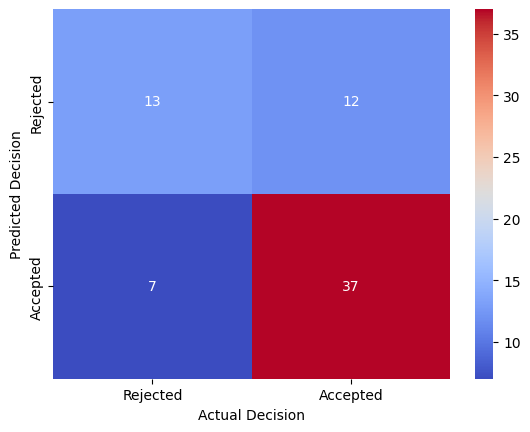

In [24]:
# Best Model = Random Forest

x = confusion_matrix(y_test, predictions["Random Forest"])
sns.heatmap(x, annot=True, cmap="coolwarm",
            xticklabels = ["Rejected", "Accepted"],
            yticklabels = ["Rejected", "Accepted"])
plt.xlabel("Actual Decision")
plt.ylabel("Predicted Decision")
plt.show()

Hyper-parameter tuning

In [25]:
# Hyper-parameter tuning for the best model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 20, 50, 60],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the classifier with the best parameters on the entire training set
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)


## Evaluating performance

In [26]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy with Best Hyperparameters: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy with Best Hyperparameters: 0.7101
              precision    recall  f1-score   support

           0       0.63      0.48      0.55        25
           1       0.74      0.84      0.79        44

    accuracy                           0.71        69
   macro avg       0.69      0.66      0.67        69
weighted avg       0.70      0.71      0.70        69



## Interpretation
This model has an accuracy of 71% compared to 64% of the base case along with better Recall and Precision, thus, this model is better able to capture and model the behavioral and social trends that classical economics did not model.